In [64]:
import numpy as np 
import pandas as pd 


df = pd.read_csv("/kaggle/input/heartbeat/ptbdb_abnormal.csv",header = None)
df["abrnomal"] = 1
print(df.shape)

df1 = pd.read_csv("/kaggle/input/heartbeat/ptbdb_normal.csv",header = None)
df1["abrnomal"] = 0
print(df1.shape)

df_total = pd.concat([df,df1],axis = 0).fillna(0)

print(df_total.shape)

(10506, 189)
(4046, 189)
(14552, 189)


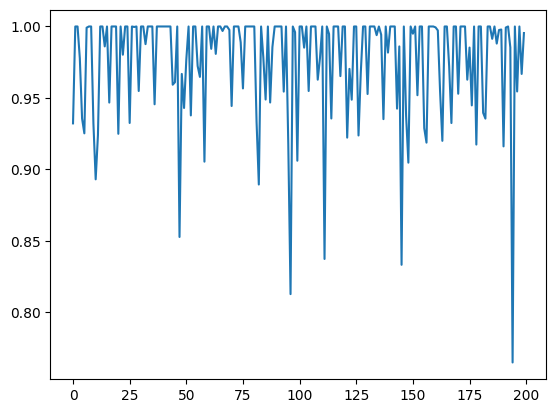

In [65]:
import matplotlib.pyplot as plt
plt.plot(df[0][0:200])


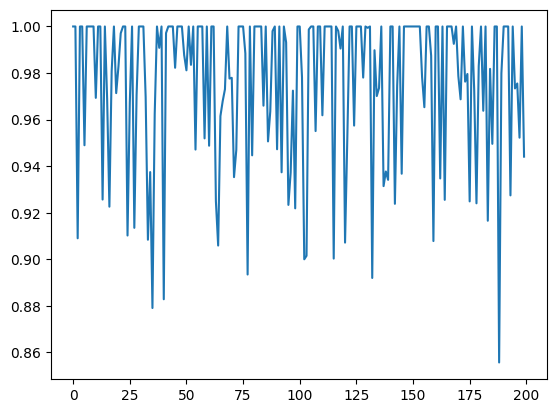

In [66]:
plt.plot(df1[0][0:200])

**The logistic regression algorithm was overfitting due to some reason**

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
X = df_total.drop(columns=["abrnomal"]).dropna()
y = df_total["abrnomal"].dropna()
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.33,train_size=0.67, random_state=42)

model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)
y_pred = model_lr.predict(X_test) 
accuracy =accuracy_score(y_test,y_pred)
print(accuracy)

1.0


In [68]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

#Trying out shallow neural net
class neural_hearbeat(nn.Module):
    def __init__(self):
        super(neural_hearbeat, self).__init__()
        self.fc1 = nn.Linear(188, 64) 
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32,1)
        self.dropout1 = nn.Dropout(0.5) 
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.dropout1(x)
        x = torch.sigmoid(x)  
        return x

device = torch.device("cuda")
model = neural_hearbeat().to(device)

criterion = nn.BCELoss()
optimzation = optim.Adam(model.parameters(), lr=1e-8) 

X_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
train_loader = torch.utils.data.DataLoader(dataset=torch.utils.data.TensorDataset(X_tensor, y_tensor), batch_size=1024, shuffle=True)


In [69]:
print(train_loader)

Epoch 0
0.665224552154541
Epoch 10
0.6675786375999451
Epoch 20
0.6632190942764282
Epoch 30
0.6794645190238953
Epoch 40
0.6602106094360352
Epoch 50
0.6647525429725647
Epoch 60
0.6590481400489807
Epoch 70
0.667209267616272
Epoch 80
0.6675204634666443
Epoch 90
0.6718161702156067
Epoch 100
0.6652945280075073
Epoch 110
0.6710988283157349
Epoch 120
0.6719109416007996
Epoch 130
0.6721490025520325
Epoch 140
0.6617124676704407
Epoch 150
0.6774733662605286
Epoch 160
0.6715096831321716
Epoch 170
0.661016047000885
Epoch 180
0.667479932308197
Epoch 190
0.6669230461120605
Epoch 200
0.6658496856689453
Epoch 210
0.6715984344482422
Epoch 220
0.6645553708076477
Epoch 230
0.6705653667449951
Epoch 240
0.6732954382896423
Epoch 250
0.6753279566764832
Epoch 260
0.6727553606033325
Epoch 270
0.669327437877655
Epoch 280
0.665930449962616
Epoch 290
0.6690998077392578
Epoch 300
0.6690788269042969
Epoch 310
0.6676144599914551
Epoch 320
0.6686944365501404
Epoch 330
0.6645740866661072
Epoch 340
0.6694083213806152
Ep

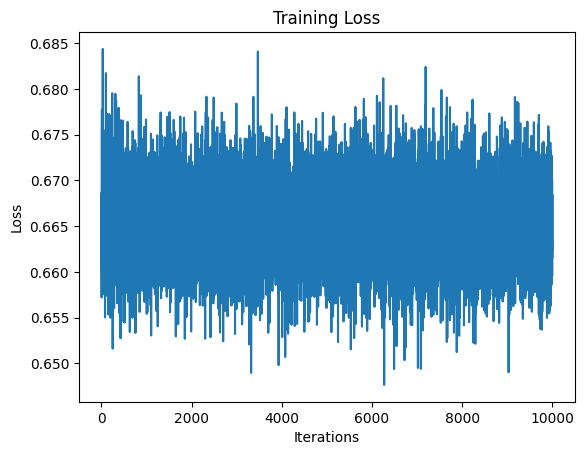

In [70]:
import matplotlib.pyplot as plt

model.train()
rloss = []
correct = 0
total = 0

for epoch in range(1000):
    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimzation.zero_grad() 

        outputs = model(inputs)
        loss = criterion(outputs.float().squeeze(), labels.float().squeeze()) 
        loss.backward()
        optimzation.step() 

        rloss.append(loss.item())

        probabilities = torch.sigmoid(outputs)
        predicted_classes = (probabilities >= 0.5).float()  
        
        total += labels.size(0)
        correct += (predicted_classes.squeeze() == labels.float()).sum().item()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}")
        print(loss.item())
# Calculate accuracy
accuracy = correct / total * 100
print(f'Accuracy: {accuracy:.2f}%')

# Plot the loss
plt.plot(rloss)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [71]:
import numpy as np 
import pandas as pd 


df2 = pd.read_csv("/kaggle/input/heartbeat/mitbih_train.csv",header = None)
print(df2.iloc[:, -1])

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
87549    4.0
87550    4.0
87551    4.0
87552    4.0
87553    4.0
Name: 187, Length: 87554, dtype: float64


In [72]:
print(df2.shape)

(87554, 188)


In [73]:
lr1 = LogisticRegression()
X = df2.iloc[:,0:187]
print(x.shape)
Y = df2.iloc[:,-1]

torch.Size([2, 187])


In [86]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim 

class Mitbih(nn.Module):
    def __init__(self):
        super(Mitbih, self).__init__()
        self.fc1 = nn.Linear(in_features=187, out_features=512)
        self.bn1 = nn.BatchNorm1d(512)
        self.fc2 = nn.Linear(in_features=512, out_features=256)
        self.bn2 = nn.BatchNorm1d(256)
        self.fc3 = nn.Linear(in_features=256, out_features=128)
        self.bn3 = nn.BatchNorm1d(128)
        self.fc4 = nn.Linear(in_features=128, out_features=5)
        self.dropout1 = nn.Dropout(0.5)
        self.sm = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x) 
        x = F.relu(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.bn2(x) 
        x = F.relu(x)
        x = self.fc3(x)
        x = self.bn3(x)
        x = F.relu(x)
        x = self.dropout1(x)
        x = self.fc4(x) 
        x = self.sm(x)  
        return x

x_train = torch.from_numpy(X.values).type(torch.float32).to(device)
y_train = torch.tensor(Y, dtype=torch.long).to(device)

model = Mitbih().to(device)
data_loader = torch.utils.data.DataLoader(
    torch.utils.data.TensorDataset(x_train, y_train), 
    batch_size=64, 
    shuffle=True)

# Define optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

In [89]:
loss_mit = []
accuracies = []

for epoch in range(30):
    accuracy = 0
    total = 0
    for x,y in data_loader:
        x = x.to(device)
        y = y.to(device)
        predicted = model(x)
        optimizer.zero_grad()
        loss = loss_fn(predicted, y)
        loss.backward()
        optimizer.step()
        loss_mit.append(loss.item())
        _, predicted = torch.max(predicted.data, 1)
        total += y.size(0)
        accuracy += (predicted == y).sum().item()
    if epoch % 5 == 0:
        print(f"Epoch {epoch}")
        print(loss.item())
        print(accuracy/total)
        accuracies.append(accuracy/total)

Epoch 0
0.9048325419425964
0.9563240971286292
Epoch 5
0.9048325419425964
0.9587111953765676
Epoch 10
0.9048325419425964
0.9595678095803732
Epoch 15
0.9048325419425964
0.9608013340338534
Epoch 20
0.9048325419425964
0.9617721634648332
Epoch 25
1.4048324823379517
0.963051374009183


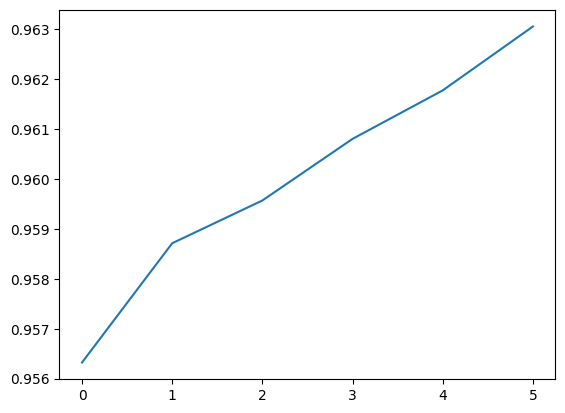

In [92]:
plt.plot(accuracies)

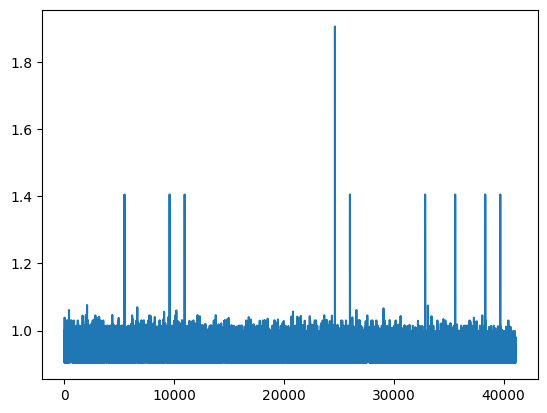

In [93]:
plt.plot(loss_mit)

In [100]:
import numpy as np 
import pandas as pd 


df_test = pd.read_csv("/kaggle/input/heartbeat/mitbih_test.csv",header = None)
x_test = df_test.iloc[:,0:187]
y_test = df_test.iloc[:,-1]
x_t = torch.from_numpy(x_test.values).type(torch.float32).to(device)
y_t = torch.tensor(y_test, dtype=torch.long).to(device)

In [101]:
predicted_test = model(x_t)
_, predicted_cc = torch.max(predicted_test.data, 1)
accurate = (predicted_cc == y_t).sum().item()

total = y_t.size(0)
print(accurate/total)

0.9638224008770327
